# **Analysis of Passenger Satisfaction in Flights**

Customer’s experience is one of the important concern for airline industries. In order to attract customers, airlines around the world are striving to
improve service quality to increase customer satisfaction, which is directly related to re-use intention as well as
price competition. However, by using customer evaluation data on aviation service, customer satisfaction has
been improved. The analysis gives an insight into the factors leads to the customer satisfaction in an airline.




https://raw.githubusercontent.com/TharunNB/Data-Science/main/data/satisfaction.csv






##**Data Dictionary**

Variable | Description
--- | ---
**Gender** | Gender of the passengers (Female, Male)
**Customer Type** | The customer type (Loyal customer, disloyal customer)
**Age** | The actual age of the passengers
**Type of Travel** | Purpose of the flight of the passengers (Personal Travel, Business Travel)
**Class** | Travel class in the plane of the passengers (Business, Eco, Eco Plus)
**Flight distance** | The flight distance of this journey
**Inflight wifi service** | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
**Departure/Arrival time convenient** | Satisfaction level of Departure/Arrival time convenient
**Ease of Online booking** | Satisfaction level of online booking
**Gate location** | Satisfaction level of Gate location
**Food and drink** | Satisfaction level of Food and drink
**Online boarding** | Satisfaction level of online boarding
**Seat comfort** | Satisfaction level of Seat comfort
**Inflight entertainment** | Satisfaction level of inflight entertainment
**On-board service** | Satisfaction level of On-board service
**Leg room service** | Satisfaction level of Leg room service
**Baggage handling** | Satisfaction level of baggage handling
**Check-in service** | Satisfaction level of Check-in service
**Inflight service** | Satisfaction level of inflight service
**Cleanliness** | Satisfaction level of Cleanliness
**Departure Delay in Minutes** | Minutes delayed when departure
**Arrival Delay in Minutes** | Minutes delayed when Arrival
**Satisfaction** | Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Import Libraries

In [ ]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
label_encoder = preprocessing.LabelEncoder()

# Import Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/TharunNB/Data-Science/main/data/satisfaction.csv')

In [ ]:
data.head(5)

,Unnamed: 0,Unnamed: 0.1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
data.tail(5)

,Unnamed: 0,Unnamed: 0.1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129875,103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
129877,103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
129879,103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [ ]:
data.shape

(129880, 26)

Inference: Dataset comprises of 129880 observations and 26 characteristics.

**Removing unnecessary Columns:**<br>
Columns "Unamed: 0" and "Unamed 0.1" doesn't have any purpose<br>
Column "id" doesnt serve any purpose

In [ ]:
data = data.drop('Unnamed: 0.1',axis = 1)
data = data.drop('Unnamed: 0',axis = 1)
data = data.drop('id',axis = 1)

In [ ]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [ ]:
data.dtypes.value_counts()

int64      17
object      5
float64     1
dtype: int64

In [ ]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

#Preprocessing<br>
Data Cleaning<br>
Replace "neutral or disatisfied" as "disatisfied" for increasing readability in charts

In [ ]:
data['satisfaction'] = data['satisfaction'].replace(['neutral or dissatisfied'],'dissatisfied')

In [ ]:
data['satisfaction'].value_counts()

dissatisfied    73452
satisfied       56428
Name: satisfaction, dtype: int64

 Handling Missing Data

In [ ]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Most of the flights are on-time -> Arrival delay is 0.

Thus, mode = 0.



In [ ]:
data['Arrival Delay in Minutes'].mode()

0    0.0
dtype: float64

In [ ]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Departure Delay in Minutes'])

In [ ]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

#Encoding

In [ ]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

detect categorical data for encoding

In [ ]:
data.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [ ]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [ ]:
data['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [ ]:
data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [ ]:
encoded = data.copy()

In [ ]:
encoded['Gender']= label_encoder.fit_transform(encoded['Gender'])
encoded['Customer Type']= label_encoder.fit_transform(encoded['Customer Type'])
encoded['Type of Travel']= label_encoder.fit_transform(encoded['Type of Travel'])
encoded['Class']= label_encoder.fit_transform(encoded['Class'])
encoded['satisfaction']= label_encoder.fit_transform(encoded['satisfaction'])

In [ ]:
encoded.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


# Outliers

In [ ]:
df = data.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


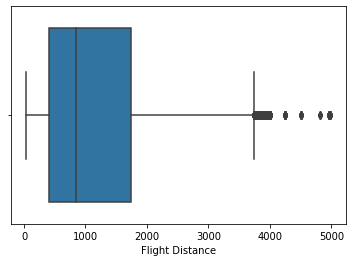

In [ ]:
sns.boxplot(df["Flight Distance"])
plt.show()

In [ ]:
q1 = df['Flight Distance'].quantile(0.25)
print(q1)
q3 = df['Flight Distance'].quantile(0.75)
print(q3)
iqr = q3-q1
print(iqr)

414.0
1744.0
1330.0


In [ ]:
upper = q3+1.5*iqr
print(upper)
lower = q1-1.5*iqr
print(lower)

3739.0
-1581.0


In [ ]:
df1 = df['Flight Distance']
n1 = np.where(df1>=upper)
n2 = np.where(df1<=lower)
df1.drop(n1[0], inplace = True)
df1.drop(n2[0], inplace = True)

In [ ]:
df1.shape

(127016,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


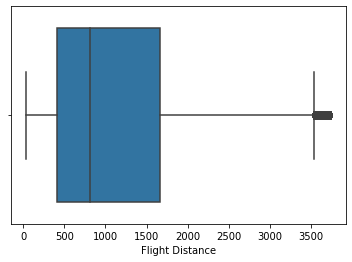

In [ ]:
sns.boxplot(df1)

# Visualization

In [ ]:
data['satisfaction'].mode()

0    dissatisfied
dtype: object

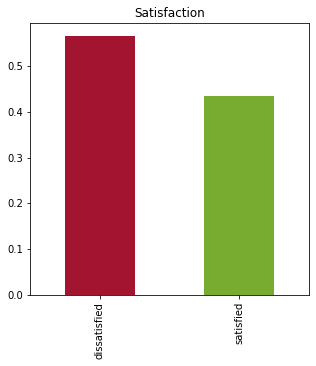

In [ ]:
fig = plt.figure(figsize = (5,5))
data.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['#A2142F','#77AC30'])
plt.title('Satisfaction')
plt.show()

Inference:<br>
**Satisfaction:**
There are more unsatisfied customers than satisfied.

### **<center>Gender vs Satisfaction</center>**

<a name="4"></a>

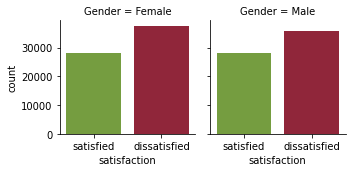

In [ ]:
graph = sns.catplot(x="satisfaction", col="Gender", col_wrap=2, data=data, kind="count", height=2.5, aspect=1.0, palette=sns.color_palette(['#77AC30', '#A2142F']))  
plt.show()

Inference:<br>
**Gender:**
As it can be observed the distribution based on gender and satisfaction is the same on both genders .
There are more unsatified customers.

### **<center>Customer Type vs Satisfaction</center>**

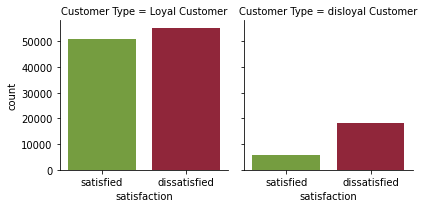

In [ ]:
graph = sns.catplot(x="satisfaction", col="Customer Type", col_wrap=2, data=data, kind="count", height=3, aspect=1.0, palette=sns.color_palette(['#77AC30', '#A2142F']))
plt.show()

Inference:<br>
**Customer Type:**

Loyal customers - No of loyal customers are higher than disloyal, but the satisfaction levels are nearly equal with more dissatisfied loyal customers.

Disloyal customers - No of disloyal customers is on the lower side but dissatisfaction among the disloyal customers is visibly higher than satisfied customers.

### **<center>Age vs Satisfaction</center>**


<a name="5"></a>
Customer's age could be a deciding factor to determine satisfaction. Expecting a trend in age and the decision they make.

In [ ]:
data.Age.max()

85

In [ ]:
data.Age.min()

7

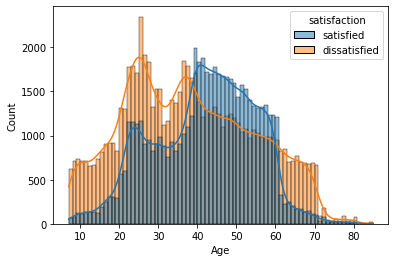

In [ ]:
sns.histplot(x='Age', hue="satisfaction", stat="count", binwidth=1, data=data, kde=True)
plt.show()

Inference:<br>
**AGE:**

Customers in the age groups of 7-37 and 61-80 are more dissatisfied with the flight. While customers in the age group of 39-60 have a higher satisfaction rate.

Age group between 60-70 seems to be uniform curve. 

There could be a one single reason(with respect to age) for everyone in the age group for getting dissatisfied.



### **<center>Class vs Satisfaction</center>**

<a name="3"></a>

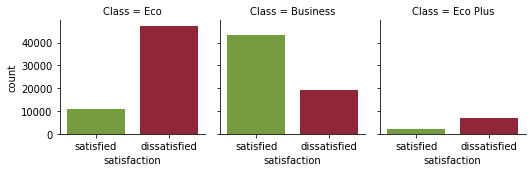

In [ ]:
graph = sns.catplot(x="satisfaction", col="Class", col_wrap=3, data=data, kind="count", height=2.5, aspect=1.0, palette=sns.color_palette(['#77AC30', '#A2142F']))
plt.show()

Inference:<br>
**CLASS:**

Eco and Eco plus has a high rate of disatisfied customers when compared to satisfied passengers in their class, on the contrary Business class customers are more satisfied with the flight. 


### **<center>Type of Travel vs Satisfaction</center>**

<a name="7"></a>

In [ ]:
data['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

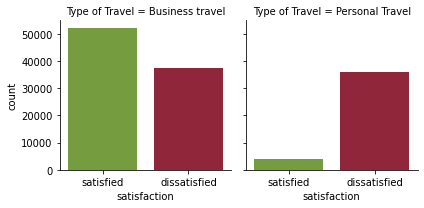

In [ ]:
graph = sns.catplot(x="satisfaction", col='Type of Travel', data=data, kind="count", height=3,aspect=1, palette=sns.color_palette(['#77AC30', '#A2142F']))
plt.show()

Inference:<br>
Type of Travel: Customers travelling for personal reasons are more dissatisfied with the flight than customers travelling for business reasons.

Personal travel is associated with low satisfaction levels.

### **<center>Flight Distance vs Satisfaction</center>**

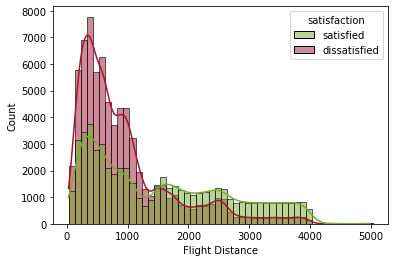

In [ ]:
sns.histplot(x='Flight Distance', hue="satisfaction", data=data, kde=True, binwidth = 100, palette=sns.color_palette(['#77AC30', '#A2142F']))
plt.show()

Inference:<br>
FLIGHT DISTANCE:
Longer Flights(1500-4100) generally have a higher satisfaction rate than flights of smaller length(0-1400).

Eco and Eco + : shorter flights were taken more often in these classes 

### **<center>Departure Delay, Arrival Delay vs Satisfaction</center>**

<a name="1"></a>

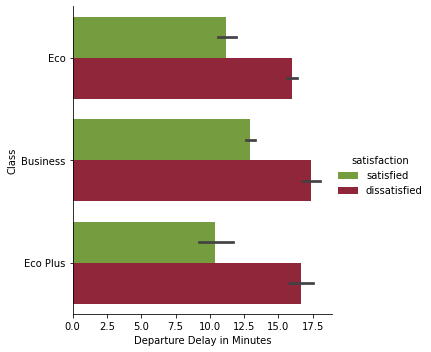

In [ ]:
sns.catplot(x='Departure Delay in Minutes', y='Class', hue ="satisfaction",  data=data, kind="bar", palette=sns.color_palette(['#77AC30', '#A2142F']))
plt.show()

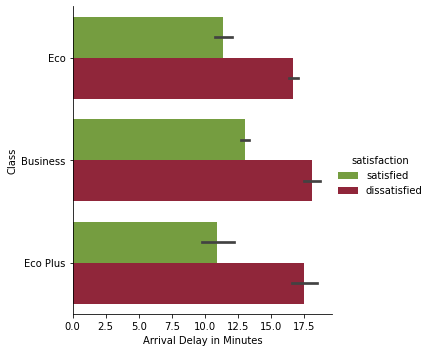

In [ ]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].round(0).astype(int)
sns.catplot(x='Arrival Delay in Minutes', y='Class', hue ="satisfaction",  data=data, kind="bar", palette=sns.color_palette(['#77AC30', '#A2142F']))
plt.show()

Inference:<br>
Arrival Delay in Minutes & Departure Delay in Minutes:

Lesser delay resulted in more satisfied customers , likewise higher delay resulted in dissatified customers

### **<center>Correlation(features vs Satisfaction)</center>**

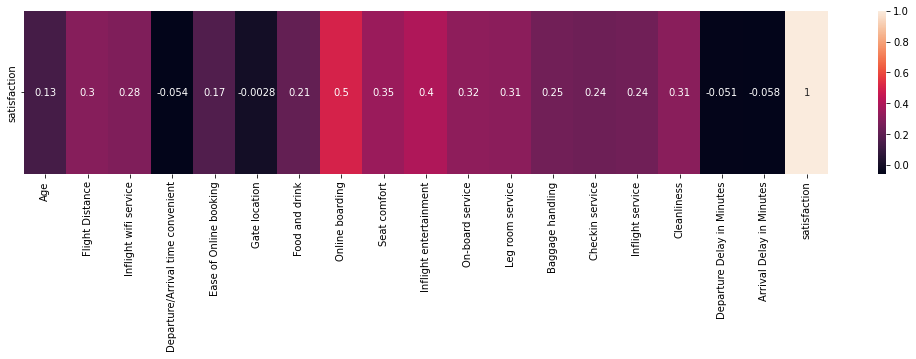

In [ ]:
d1 = data.copy()
d1['satisfaction']= label_encoder.fit_transform(d1['satisfaction'])
plt.figure(figsize = (18,3))
sns.heatmap(d1.corr().loc[['satisfaction'],:], annot = True)
plt.show()

Inference:<br>
CORRELATION OF DATA :

Satisfaction vs - Higher rating in Online boarding has the most positive impact in getting satisfied customers followed by Ratings of  inflight entertainment and Seat comfort.

On the other end Higher values of Time convinience ,Delay and gatelocation 


### **<center>Online boarding Satisfaction Analysis</center>**

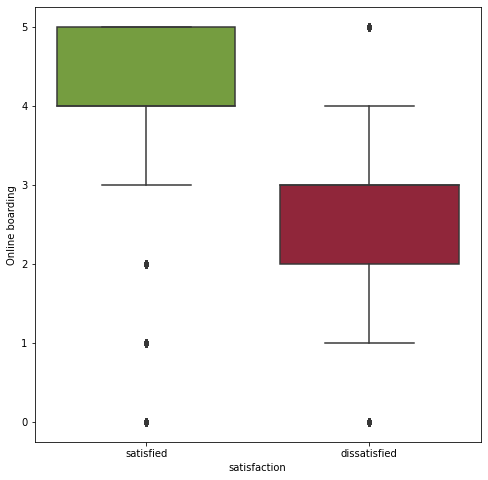

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x='satisfaction', y ='Online boarding', data=data, palette=sns.color_palette(['#77AC30', '#A2142F']))
plt.show()

Inference: Online Boarding is more skewed towards satisfaction.

# Hypotheses



1. [High arrival delay can lead to less passenger satisfaction.](#1)
2. [Departure delay may lead to Arrival delay.](#2)
3. [Economy class has highest proportion of dissatisfied passengers.](#3)
4. [Female passengers are associated with low satisfaction levels.](#4)
5. [Customer's age could be a deciding factor to determine satisfaction. Aged people ranging 60 to 70 may be unsatisfied due to common reason like poor service provided, etc.](#5)
6. [Middle aged may be highly satisfied when travelling in business class.(Age has negative impact as it increases)](#6)
7. [Passengers travelling for personal puposes are more dissatisfied than Business Travel passengers (due to various external factors)-Proof by contradiction](#7)
8. [Seat comfortness may lead to more satisfaction.](#8)
9. [More satisfied the passenger is with inflight entertainment, satisfaction rate of him/her will be high.](#9)
10. [Passengers with high seat comfort tend to enjoy inflight entertainment more likely.](#10) 


<a name="6"></a>

Inter-quantile age is 27 to 51

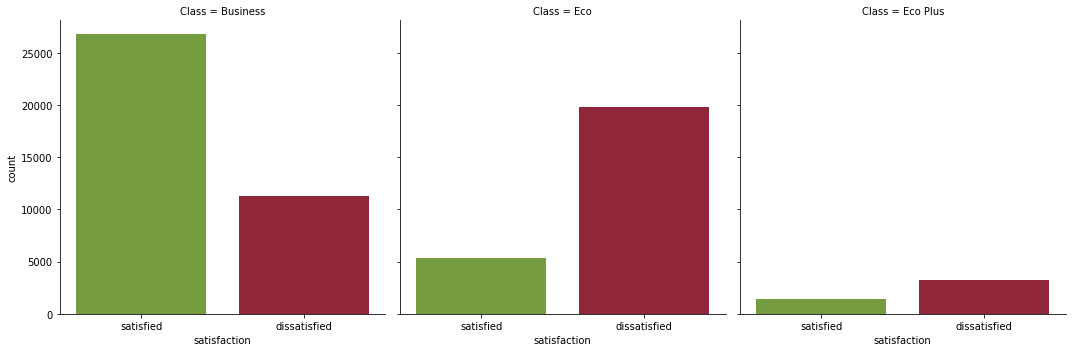

In [ ]:
df_middle_age = data[data["Age"].between(27,51)]
sns.catplot(x="satisfaction", col="Class", data=df_middle_age, kind="count", palette=sns.color_palette(['#77AC30', '#A2142F']))
plt.show()

<a name="2"></a>


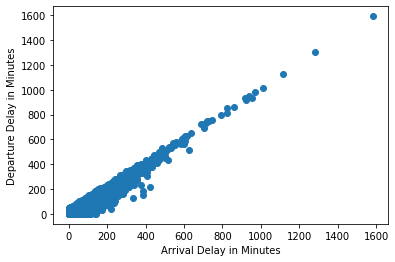

In [ ]:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'])
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')
plt.show()

<a name="8"></a>

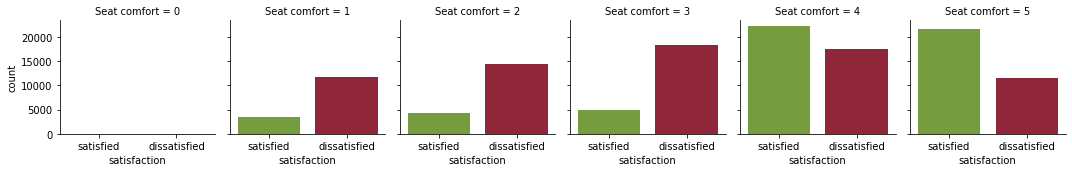

In [ ]:
sns.catplot(x="satisfaction", col="Seat comfort", col_wrap=6, data=data, kind="count", height=2.5, aspect=1.0, palette=sns.color_palette(['#77AC30', '#A2142F']))
plt.show()

<a name="9"></a>

Inflight entertainment is correlated with satisfaction

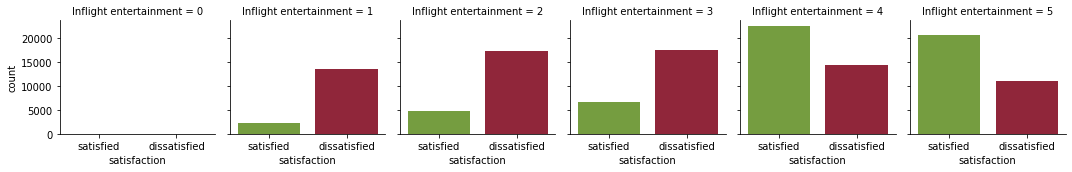

In [ ]:
sns.catplot(x="satisfaction", col="Inflight entertainment", col_wrap=6, data=data, kind="count", height=2.5, aspect=1.0, palette=sns.color_palette(['#77AC30', '#A2142F']))  
plt.show()

Inference:<br>
As we can see when the quality of inflight entertainment is high the number of passengers satisfied is significantly high and the correlation is also high (0.5) compared to other entities

<a name="10"></a>

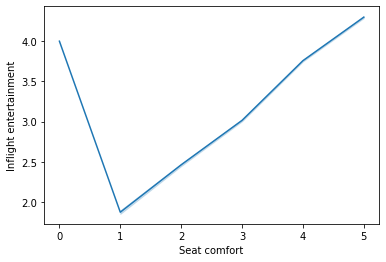

In [ ]:
sns.lineplot(x="Seat comfort", y="Inflight entertainment", data=data)
plt.show()

# Heatmap

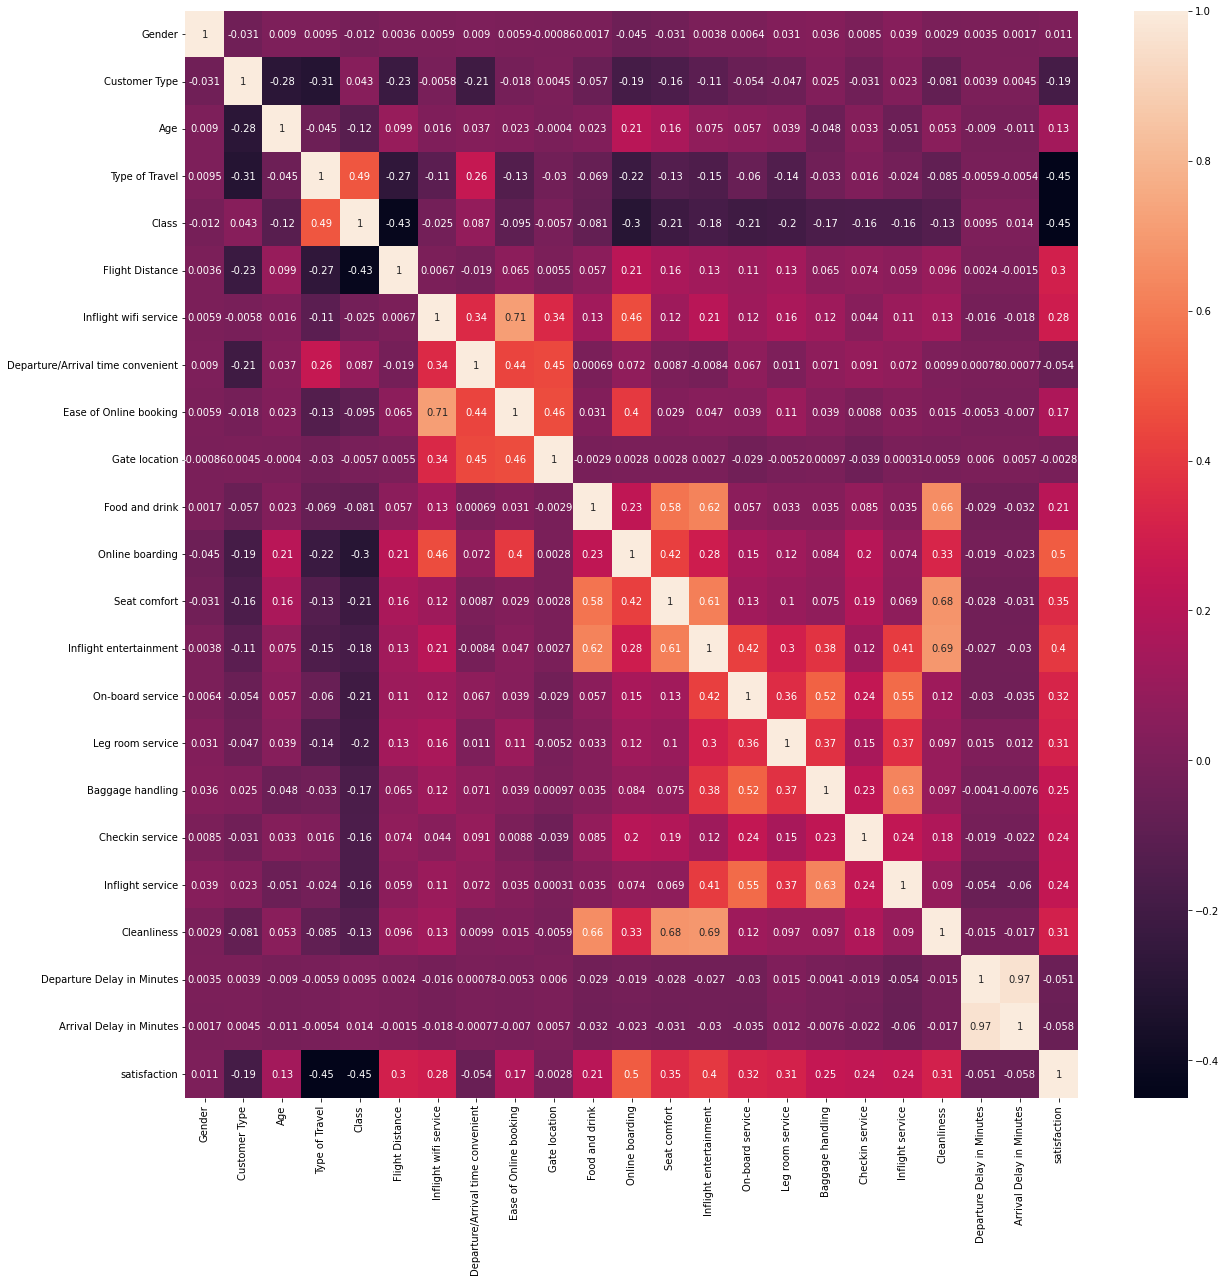

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(encoded.corr(),annot=True)
plt.show()

# Normalizing

In [ ]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(encoded)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(encoded), columns=encoded.columns)
modified_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,0.0,0.576923,0.0,0.5,0.026050,1.0,0.8,0.6,0.8,0.6,0.8,0.6,1.0,1.0,1.0,1.00,0.4,1.0,1.0,0.031407,0.027778,1.0
1,0.0,0.0,0.371795,0.0,0.0,0.571890,0.2,0.2,0.6,0.2,1.0,0.8,1.0,0.8,0.8,0.8,0.75,0.6,0.8,1.0,0.000000,0.000000,1.0
2,1.0,1.0,0.166667,0.0,0.5,0.032512,0.4,0.0,0.4,0.8,0.4,0.4,0.4,0.4,0.8,0.2,0.50,0.4,0.4,0.4,0.000000,0.000000,0.0
3,1.0,0.0,0.474359,0.0,0.0,0.675687,0.0,0.0,0.0,0.4,0.6,0.8,0.8,0.2,0.2,0.2,0.00,0.6,0.2,0.8,0.000000,0.003788,1.0
4,0.0,0.0,0.538462,0.0,0.5,0.232431,0.4,0.6,0.8,0.6,0.8,0.2,0.4,0.4,0.4,0.4,0.25,0.8,0.4,0.8,0.000000,0.012626,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0.0,1.0,0.205128,0.0,0.5,0.032512,0.4,0.2,0.4,0.6,0.4,0.4,0.4,0.4,0.6,0.2,0.75,0.4,0.6,0.4,0.001884,0.000000,0.0
129876,1.0,0.0,0.538462,0.0,0.0,0.467690,0.8,0.8,0.8,0.8,0.4,0.8,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.8,0.000000,0.000000,1.0
129877,1.0,1.0,0.294872,0.0,0.0,0.396607,0.2,0.2,0.2,0.6,0.8,0.2,1.0,0.8,0.6,0.4,0.75,1.0,1.0,0.8,0.004397,0.008838,0.0
129878,0.0,1.0,0.192308,0.0,0.5,0.195679,0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2,0.8,1.0,0.00,1.0,0.8,0.2,0.000000,0.000000,0.0


# Feature Extraction

In [ ]:
#from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
#selector = SelectKBest(chi2, k=11)
#selector.fit(X, y)
#X_new = selector.transform(X)
#print(X.columns[selector.get_support(indices=True)])

Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Cleanliness'],
      dtype='object')

These are the features that contribute to the 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 22)
pca_fit = pca.fit(X)

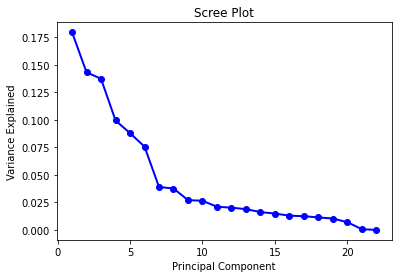

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_*100)

[1.79690606e+01 1.43279997e+01 1.37388863e+01 9.95233497e+00
 8.79729310e+00 7.57413413e+00 3.90632540e+00 3.76333819e+00
 2.70930817e+00 2.64842998e+00 2.10782708e+00 2.02372044e+00
 1.88975808e+00 1.62110991e+00 1.48802488e+00 1.29728880e+00
 1.24712817e+00 1.13735369e+00 1.03604832e+00 7.00141952e-01
 6.33724750e-02 1.11564023e-03]


Helper Function

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
def LogisticRegressionTest(X,y):
  xtrain, xtest, ytrain, ytest = train_test_split(
          X, y, test_size = 0.33, random_state = 0)
  classifier = LogisticRegression(random_state = 0,max_iter=1000,solver="lbfgs")
  classifier.fit(xtrain, ytrain.values.ravel())
  print(classifier.score(xtest,ytest)*100)

In [ ]:
pca = PCA(n_components=11)
selector = pca.fit(X)
selector.fit(X, y)
X_new = selector.transform(X)
print("before feature selection")
LogisticRegressionTest(X,y)
print("after feature selection")
LogisticRegressionTest(X_new,y)

before feature selection
87.55045379249201
after feature selection
87.0115022981265


# Imbalance

the data is pretty much balanced to some extent<br>

In [ ]:
#from imblearn.over_sampling import SMOTENC
#from collections import Counter
#oversample = SMOTENC(categorical_features=[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
#X, y = oversample.fit_resample(X,y)
#counter = Counter(y.satisfaction)
#print(counter)

**X_new** is the new set of 11 colums extracted from 23 columns.<br>

X -> X_new &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *// 11 features<br>*
y -> y

# Modeling

In [ ]:
X_new

array([[-0.5529133 ,  0.02769169, -0.5971724 , ...,  0.13117867,
        -0.20147467,  0.12667605],
       [-0.64820029,  0.34265524, -0.3484563 , ..., -0.13093645,
         0.14563582, -0.04380753],
       [ 0.3881178 ,  0.55630106,  1.147884  , ..., -0.2761591 ,
        -0.19128714, -0.10400045],
       ...,
       [-0.35486298,  0.19658576,  0.86444958, ..., -0.12295565,
         0.00531118, -0.22538467],
       [ 0.50261303,  1.2331219 ,  0.47711613, ...,  0.63858363,
         0.26655644, -0.06468854],
       [ 0.51266436,  0.16735872,  0.87826815, ..., -0.1447794 ,
        -0.23482741, -0.44389572]])

In [ ]:
y

,satisfaction
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
129875,0.0
129876,1.0
129877,0.0
129878,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=4)

In [ ]:
print(X_train)

[[-0.04615078  0.22501691  0.92087504 ... -0.49348791 -0.16692532
   0.29058274]
 [ 0.5625234   0.09943719  0.76332168 ...  0.8512146  -0.13551949
   0.1821424 ]
 [ 0.14917142  1.02208749  0.26002741 ... -0.04349404 -0.17944487
  -0.11340975]
 ...
 [ 0.90328663  0.21666853 -0.43528821 ...  0.06681809  0.36459675
   0.12589496]
 [ 0.844708   -0.55928584  0.18851369 ... -0.18761261 -0.11420853
  -0.12516223]
 [ 0.36401814 -0.1603879  -0.80514865 ...  0.2749634   0.33106448
  -0.16147189]]


In [ ]:
print(X_train.shape, X_test.shape)

(103904, 11) (25976, 11)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
grid_params = {    
    'Logistics Regression' : {
        'Classifier' : LogisticRegression(solver = 'lbfgs', multi_class = 'auto'),
        'Parameter' : {
            'C' : [0.1, 1, 10, 100],
            'solver' : ['lbfgs', 'liblinear']
        }
    },
    'Random Forest' :{
        'Classifier' : RandomForestClassifier(),
        'Parameter' : {
            'n_estimators' : [1, 5, 10, 100]
        }
    }
}

In [ ]:
modelInfo = []

for classifierName, model in grid_params.items():
    clf = GridSearchCV(model['Classifier'], model['Parameter'], cv=5, n_jobs=-1)
    print( "Fitting ", model['Classifier'])
    clf.fit(X_train, y_train.values.ravel())
    print("Classification report: \n", classification_report(y_test,clf.best_estimator_.predict(X_test)))
    modelInfo.append({
        'Classifier' : classifierName,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

Fitting  LogisticRegression()
Classification report: 
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     14611
         1.0       0.87      0.83      0.85     11365

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Fitting  RandomForestClassifier()
Classification report: 
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     14611
         1.0       0.94      0.90      0.92     11365

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [ ]:
df1 = pd.DataFrame(modelInfo, columns=['Classifier', 'best_score', 'best_params'])
df1

,Classifier,best_score,best_params
0,Logistics Regression,0.868956,"{'C': 1, 'solver': 'lbfgs'}"
1,Random Forest,0.928896,{'n_estimators': 100}


# Hypothesis Testing

In [ ]:
import scipy.stats as st

In [ ]:
df = data.sample(n=1000)
n = len(df)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
17379,Female,Loyal Customer,62,Personal Travel,Eco,541,2,5,2,4,4,5,4,4,4,2,4,5,4,3,49,63,dissatisfied
56387,Male,disloyal Customer,15,Business travel,Business,483,4,4,4,5,5,4,5,5,4,3,5,3,4,5,40,45,satisfied
38637,Male,Loyal Customer,41,Business travel,Business,1635,2,2,2,2,4,5,4,4,4,4,4,4,4,3,0,0,satisfied
54853,Female,Loyal Customer,18,Personal Travel,Eco,160,5,5,5,2,3,5,3,3,4,4,5,3,5,3,0,0,satisfied
37974,Male,disloyal Customer,23,Business travel,Eco,666,5,0,4,1,4,4,4,4,5,4,5,5,4,4,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45484,Female,Loyal Customer,39,Personal Travel,Business,163,3,5,3,2,3,4,5,5,5,3,5,3,5,3,2,7,dissatisfied
41993,Male,disloyal Customer,26,Business travel,Business,944,1,1,1,5,4,1,4,4,5,5,4,3,5,4,0,0,dissatisfied
88576,Female,Loyal Customer,39,Personal Travel,Eco,2521,3,3,2,5,2,3,3,4,3,4,5,3,1,3,6,52,dissatisfied
46444,Female,Loyal Customer,26,Business travel,Business,3604,1,4,4,4,1,1,1,1,3,4,3,2,3,1,0,0,dissatisfied


## H1

Departure delay may lead to Arrival delay.

In [ ]:
# H0: Departure delay may lead to Arrival delay.
# Ha: Arrival delay is not affected by departure delay.
alpha = 0.05
degrees_of_freedom = n-1
t_critical = st.t.ppf(alpha/2,degrees_of_freedom)
df["diff"] = df["Departure Delay in Minutes"] - df["Arrival Delay in Minutes"]
xbar = df["diff"].mean()
s = df["diff"].std()
t = (xbar)/(s/np.sqrt(n))
print(t)
print(t_critical)
if(abs(t)<abs(t_critical)):
  print("The correlation between arrival delay and departure is statistically significant")
  print("Null hypothesis cannot be rejected")
else:
  print("Reject Null hypothesis")

-1.0367478995033432
-1.962341461133449
The correlation between arrival delay and departure is statistically significant
Null hypothesis cannot be rejected


## H2

In [ ]:
def check_categorical_dependency(crosstab_table, confidence_interval):
   stat, p, dof, expected = st.chi2_contingency(crosstab_table)
   print ("Chi-Square Statistic value = {}".format(stat))
   print ("P - Value = {}".format(p))
   alpha = 1.0 - confidence_interval
   if p <= alpha:
       print('Reject Null Hypothesis')
   else:
	      print('Null Hypothesis cannot be rejected')

Economy class has highest proportion of dissatisfied passengers.

In [ ]:
# H0: Satisfaction is independent of Class
# Ha: Passenger satisfaction is dependent on Class
df3 = pd.crosstab(df['Class'],df['satisfaction'],margins=True)
df3

satisfaction,dissatisfied,satisfied,All
Class,,,
Business,158,317,475
Eco,371,78,449
Eco Plus,49,27,76
All,578,422,1000


In [ ]:
check_categorical_dependency(df3, 0.95)

Chi-Square Statistic value = 232.1045199798977
P - Value = 2.7221069297830236e-47
0.050000000000000044
Reject Null Hypothesis


## H3

Female passengers are associated with low satisfaction levels.

In [ ]:
# H0: Satisfaction is independent of Gender
# Ha: Satisfaction is dependent on Gender
df4 = pd.crosstab(df['Gender'],df['satisfaction'])
df4

satisfaction,dissatisfied,satisfied
Gender,,
Female,298,204
Male,280,218


In [ ]:
check_categorical_dependency(df4, 0.95)

Chi-Square Statistic value = 0.884488085458655
P - Value = 0.3469753684648271
0.050000000000000044
Null Hypothesis cannot be rejected


## H4

People aged 60-70 are less satisfied.

In [ ]:
one_hot = pd.get_dummies(data['satisfaction'])
end = encoded.drop(['satisfaction'],axis=1)
end = end.join(one_hot)
dff = end.groupby(['Age'])['satisfied'].sum().reset_index()
df2 = end.groupby(['Age'])['dissatisfied'].sum().reset_index()
dff['ratio'] = dff['satisfied']/(df2['dissatisfied'])
dff['size'] = dff['satisfied']+(df2['dissatisfied'])
rslt = dff.loc[dff['Age']>60] 
rslt = rslt.loc[dff['Age']<70] 
n = rslt.shape[0]

In [ ]:
#H0 : Mean of satisfaction ratio is uniform in all age ranges ,μ = 0.36359 
#Ha : Mean of ratio satisfaction is lower in the age range of 60 - 70 ,μ != 0.36359

In [ ]:
n = rslt.shape[0]
degrees_of_freedom = n-1
xbar = rslt['ratio'].mean()
mu = dff['ratio'].mean()
sigma = np.sqrt((mu*(1-mu))/100)
alpha = 0.1
t = (xbar-mu)/(sigma/np.sqrt(n))
t_critical = st.t.ppf(alpha/2, degrees_of_freedom)
if (abs(t) < abs(t_critical)):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


## H5

In [ ]:
#H0 : Type of travel does not affect satisfaction
#Ha : People travelling for business reasons seem to have higher satisfacion

In [ ]:
df7 = pd.crosstab(df['Type of Travel'], df['satisfaction'], margins = True)
df7

satisfaction,dissatisfied,satisfied,All
Type of Travel,,,
Business travel,302,390,692
Personal Travel,276,32,308
All,578,422,1000


In [ ]:
check_categorical_dependency(df7, 0.95)

Chi-Square Statistic value = 184.64702268792126
P - Value = 7.488581218613896e-39
0.050000000000000044
Reject Null Hypothesis


## H6

In [ ]:
#H0 : seatcomfort does not affect satisfaction
#Ha : higher seat comfort is enjoyed by satisfied customers

In [ ]:
df8 = pd.crosstab(df['Seat comfort'], df['satisfaction'], margins = True)
df8

satisfaction,dissatisfied,satisfied,All
Seat comfort,,,
1,96,30,126
2,109,28,137
3,142,37,179
4,126,187,313
5,105,140,245
All,578,422,1000


In [ ]:
check_categorical_dependency(df8, 0.95)

Chi-Square Statistic value = 140.01366987510187
P - Value = 4.187295621507408e-25
0.050000000000000044
Reject Null Hypothesis


## H7

In [ ]:
new = data.copy()
new = new.join(one_hot)
new = end.groupby(['Flight Distance'])['satisfied'].sum().reset_index()
new2 = end.groupby(['Flight Distance'])['dissatisfied'].sum().reset_index()
new['ratio'] = new['satisfied']/(new['satisfied']+new2['dissatisfied'])
rl = new.loc[new['Flight Distance'] > new['Flight Distance'].mean() ]

In [ ]:
#H0 : Flight distance does not affect satisfaction
#Ha : Long distance fliers are more satisfied

In [ ]:
n = rl.shape[0]
degrees_of_freedom = n-1
xbar = rl['ratio'].mean()
mu = dff['ratio'].mean()
sigma = np.sqrt((mu*(1-mu))/100)
alpha = 0.1
t = (xbar-mu)/(sigma/np.sqrt(n))
t_critical = st.t.ppf(alpha/2, degrees_of_freedom)
if (abs(t)< abs(t_critical)):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


## H8

In [ ]:
# H0: Satisfaction of inflight entertainment is not related with Overall satisfaction; 
# Ha: Satisfaction of inflight entertainment is related with Overall satisfaction

In [ ]:
df9 = pd.crosstab(df['Inflight entertainment'], df['satisfaction'], margins = True)
df9

satisfaction,dissatisfied,satisfied,All
Inflight entertainment,,,
1,106,21,127
2,133,31,164
3,128,46,174
4,98,175,273
5,113,149,262
All,578,422,1000


In [ ]:
check_categorical_dependency(df9, 0.95)

Chi-Square Statistic value = 165.3243124007198
P - Value = 2.573740795862708e-30
0.050000000000000044
Reject Null Hypothesis


## H9

In [ ]:
#H0: Seat comfort and Inflight entertainment are not dependent on each other; 
#Ha: Seat comfort and Inflight entertainment are dependent on each other

In [ ]:
df10 = pd.crosstab(df['Seat comfort'], df['Inflight entertainment'], margins = True)
df10

Inflight entertainment,1,2,3,4,5,All
Seat comfort,,,,,,
1,89,4,12,11,10,126
2,7,99,12,13,6,137
3,12,26,101,26,14,179
4,12,23,37,171,70,313
5,7,12,12,52,162,245
All,127,164,174,273,262,1000


In [ ]:
check_categorical_dependency(df10, 0.95)

Chi-Square Statistic value = 1233.2192587326595
P - Value = 1.4685808351169986e-244
0.050000000000000044
Reject Null Hypothesis


#Reference

https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be

https://stats.stackexchange.com/questions/182711/principal-component-analysis-vs-feature-selection

https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
